In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Problem Statement: Decision Tree Using the CART Algorithm

You are given a dataset,“car_evaluation.csv.”Load the dataset into a DataFrame without the header and rename the columns as the list given here -['buying',  'maint',  'doors',  'persons',  'lug_boot', 'safety',  'class'].

Considering  the class column  as  the  target variable, perform the following tasks:

1.Explore the target column,class(our task is to predict how the car features  affectthe  class  of  car  asVery  good,  Good,  Acceptable,  or  Unacceptable, whichis why we have considered this column as the target column)

2.Declare feature vectors and the target variable

3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)

4.Encode all     the     ordinal     data     into     numeric     values     using     the category_encoderslibrary

5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria

6.Check the accuracy score of the model based on the Gini Index

7.Visualize the decision tree


8.Show how the importance of features affects the target variable


In [4]:
path = "C:\\Users\\alok\\Desktop\\Inzint\\datasets\\car_evaluation.csv"
df_car=pd.read_csv(path)

In [5]:
df_car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df_car.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df_car.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df_car['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [9]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
X=df_car.drop('class',axis=1)
y=df_car['class']

In [11]:
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [13]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9653179190751445


In [16]:
feature_importance = clf.feature_importances_

# Displaying feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print(feature_importance_df)

    Feature  Importance
0    buying    0.112942
1     maint    0.186945
2     doors    0.045981
3   persons    0.269722
4  lug_boot    0.125739
5    safety    0.258671


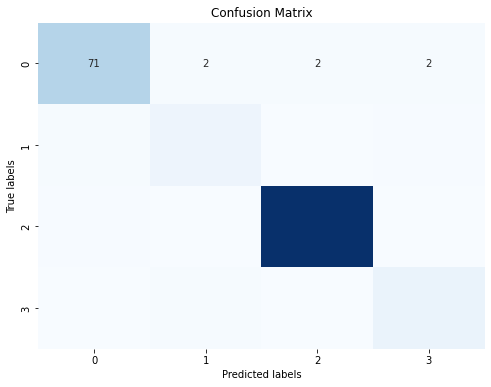

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

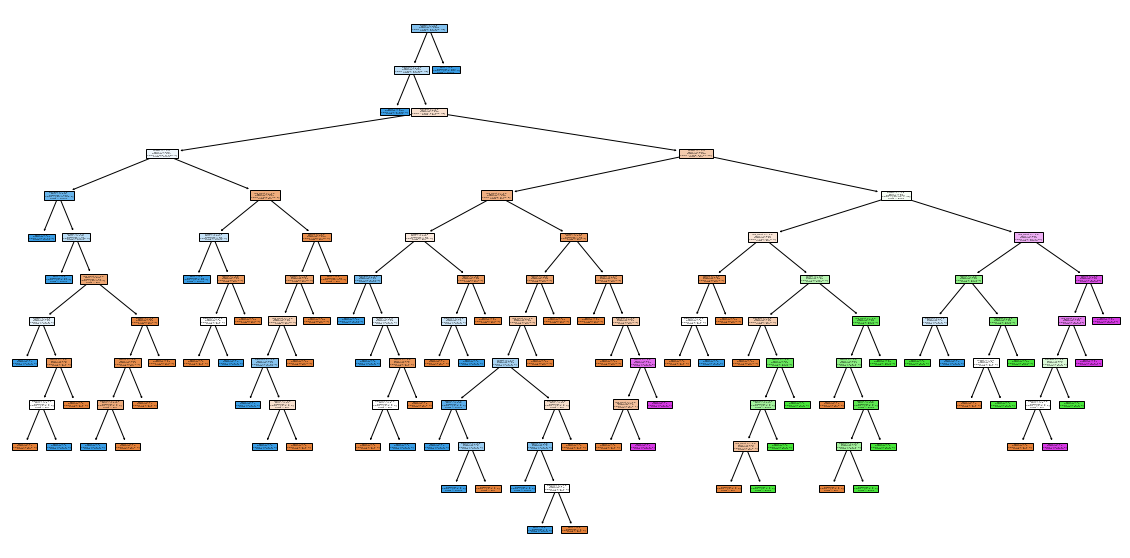

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

## Problem Statement: Random Forest

Write a Python program that reads the TaxiFare.csv file into  a  DataFrame  and  build  a  good  random  forest  model  by  performing the following tasks:

1.Load the TaxiFare.csvdataset into a DataFrame

2.Drop ‘unique_id’, and find missing values from the dataset

3.Convert the ‘date_time_of_pickup’ column to date and time format and  extract  information  and  create  new  columns  as  ‘hour‘, ‘dayOfTheMonth’,’ month’,   ‘dayOfTheWeek’.

4.Find   traveling   distance   based   on   given   coordinates   using   the "Haversine" distance formula and create anew column as ‘distance’ and store the data.

Note:The  Haversine  formula  calculates  the  shortest  distance  between two  points  on  a  sphere  using  their  latitudes  and  longitudes  measured along the surface. It is important for use in navigation.

5.Eliminate some anomalous/outlier data based on certain "Domain" logic

A.Amount < 2.5 as the minimum fare is 2.5

B.Trips with travel distance less than or equal to 1, and more than 130 Kms.
Let’s say this was a condition provided by clients based on travel range.

6.Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

7.Find important features using random forest.

8.Build  a  model  and  predict  the  result  for  the  test  dataset  based  on MAPE and RMSE


#use this function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [4]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Load dataset
df = pd.read_csv("C:\\Users\\alok\\Desktop\\Inzint\\datasets\\TaxiFare.csv")



In [5]:
print(df.isnull().sum())
print(df.columns)

unique_id               0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64
Index(['unique_id', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'amount'],
      dtype='object')


In [6]:
# Drop 'unique_id'
df.drop(columns=['unique_id'], inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Convert 'date_time_of_pickup' column to datetime and extract information
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df['hour'] = df['date_time_of_pickup'].dt.hour
df['dayOfTheMonth'] = df['date_time_of_pickup'].dt.day
df['month'] = df['date_time_of_pickup'].dt.month
df['dayOfTheWeek'] = df['date_time_of_pickup'].dt.dayofweek

# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Calculate distance and create new column 'distance'
df['distance'] = df.apply(lambda row: haversine(row['latitude_of_pickup'], row['longitude_of_pickup'], row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)

# Eliminate anomalies/outliers
df = df[(df['amount'] >= 2.5) & (df['distance'] > 1) & (df['distance'] <= 130)]

# Extract independent and dependent variables
X = df.drop(columns=['amount', 'date_time_of_pickup'])
y = df['amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict fares for test dataset
y_pred = model.predict(X_test)

# Calculate MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAPE:", mape)
print("RMSE:", rmse)


Missing values:
 date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64
MAPE: 0.19331829314074742
RMSE: 4.096898350017517


## Problem Statement: Naïve Bayes Classification

Write a Python program that reads the mobile price.csv file into a DataFrame, by doing the given task builds good naïve Bayes models.

1.Load the mobile price.csvdataset into a DataFrame

2.Check the data type of each column and change it according to their data

3.Find missing values and treat themif you found any

4.Plot bar graph for target variable and their categories with help of seaborn

5.Extract   independent   variables   (Xs)   and   dependent   variables   (Ys)   into separate data objects6

.Split data into train and test DataFrame and set test size as 0.27.

Build Gaussian and Bernoulli models, compare their accuracy

In [7]:
path = "C:\\Users\\alok\\Desktop\\Inzint\\datasets\\mobile_price\\train.csv"
df = pd.read_csv(path)
print(df.columns)
print(df.isnull().sum())
print(df.info())

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    20

In [8]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [9]:
indep_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [10]:
import seaborn as sns

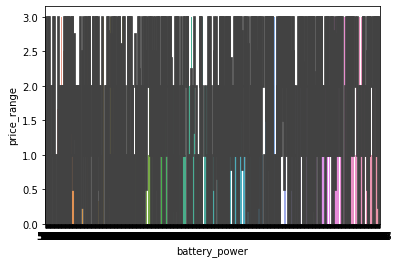

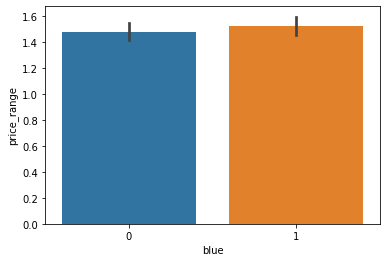

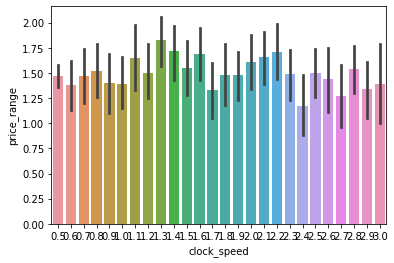

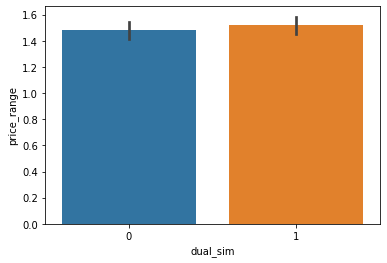

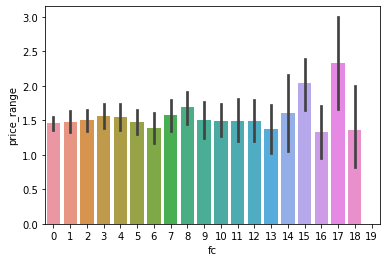

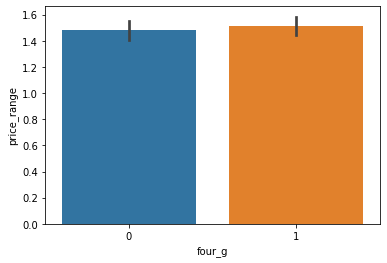

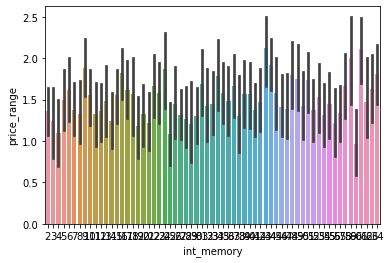

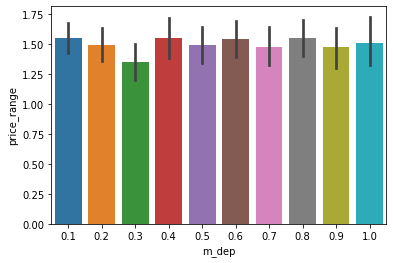

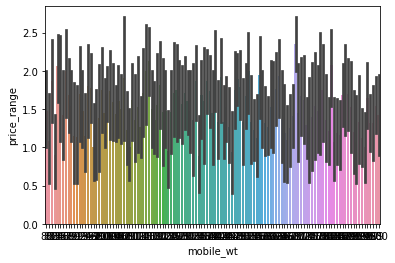

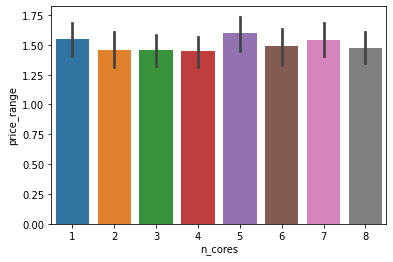

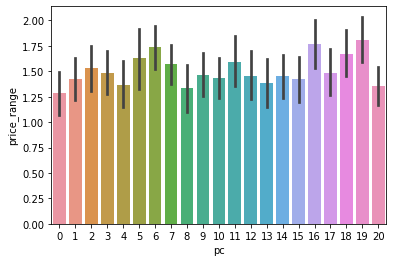

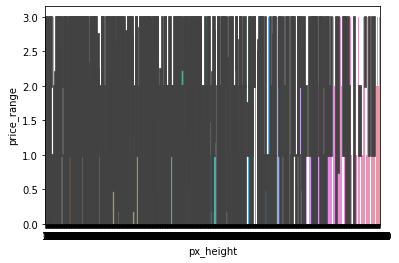

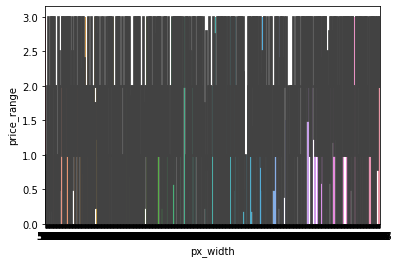

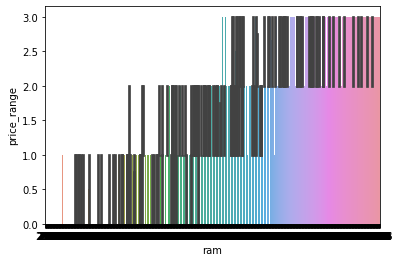

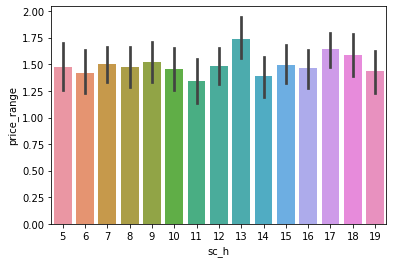

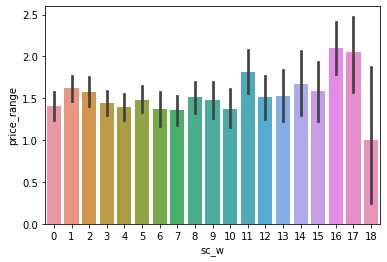

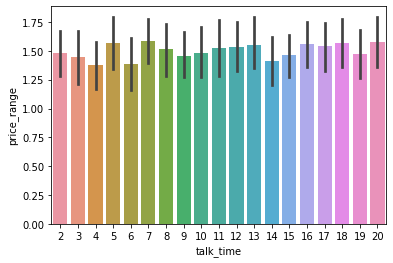

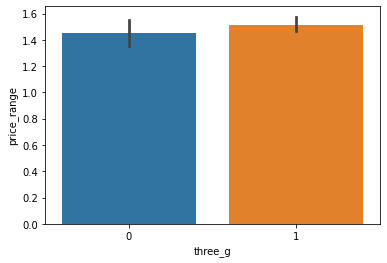

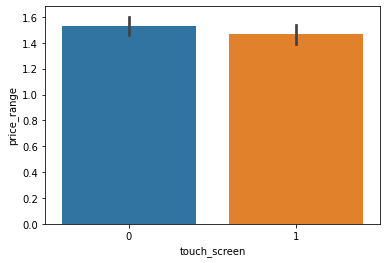

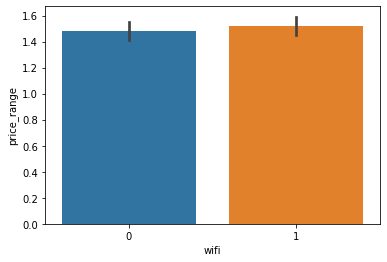

In [9]:
for indep in indep_columns:
    sns.barplot(data=df, x=indep, y=df['price_range'])
    plt.show()

Data types before conversion:
battery_power      int64
blue                bool
clock_speed      float64
dual_sim            bool
fc                 int64
four_g              bool
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g             bool
touch_screen        bool
wifi                bool
price_range        int64
dtype: object

Missing values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


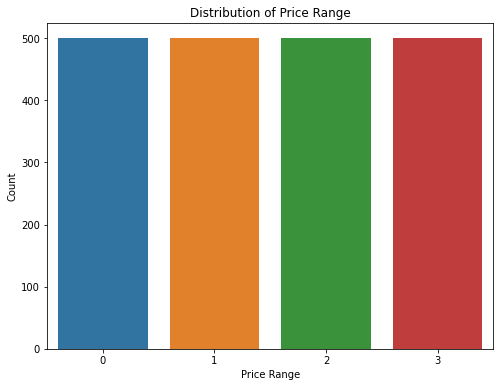


Gaussian Naive Bayes Accuracy: 0.7962962962962963
Bernoulli Naive Bayes Accuracy: 0.2351851851851852


In [14]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
path = "C:\\Users\\alok\\Desktop\\Inzint\\datasets\\mobile_price\\train.csv"
df = pd.read_csv(path)

# Check data types and convert if needed
print("Data types before conversion:")
print(df.dtypes)

# Convert data types
df['blue'] = df['blue'].astype(bool)
df['dual_sim'] = df['dual_sim'].astype(bool)
df['four_g'] = df['four_g'].astype(bool)
df['three_g'] = df['three_g'].astype(bool)
df['touch_screen'] = df['touch_screen'].astype(bool)
df['wifi'] = df['wifi'].astype(bool)

# Check for missing values and treat them
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Plot bar graph for target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='price_range')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

# Extract independent and dependent variables
X = df.drop(columns=['price_range'])
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

# Build Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# Build Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test, bnb_pred)

print("\nGaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
